In [1]:
import numpy as np
from uncertainties import unumpy as unp
from uncertainties import umath as um
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,H,SC,D1250_10,D1250_15,D1250_20,D1450_10,D1450_15,D1450_20,D1650_10,D1650_15,D1650_20,Test_1250,Test_1450,Test_1650
0,-10,18.2,13.3,15.1,15.8,11.2,13.9,14.8,9.0,12.5,13.8,11.3,9.0,6.3
1,-8,18.1,13.3,15.2,15.7,11.2,13.8,14.8,9.1,12.4,13.7,11.3,9.0,6.3
2,-6,18.1,13.2,15.0,15.6,11.2,13.6,14.7,9.0,12.4,13.7,11.2,9.0,6.3
3,-4,18.1,13.1,14.8,15.6,11.2,13.6,14.2,8.9,12.2,13.6,11.2,9.0,6.3
4,-2,18.1,12.9,14.8,15.4,11.2,13.3,14.2,8.8,12.0,13.2,11.2,9.0,6.3


In [4]:
df['error'] = np.ones_like(df.H) * 0.1

In [5]:
unp.uarray(df.D1250_10, df.error)

array([13.3+/-0.1, 13.3+/-0.1, 13.2+/-0.1, 13.1+/-0.1, 12.9+/-0.1,
       12.9+/-0.1, 12.8+/-0.1, 12.6+/-0.1, 12.6+/-0.1, 12.4+/-0.1,
       12.3+/-0.1, 12.2+/-0.1, 12.1+/-0.1, 12.0+/-0.1, 11.9+/-0.1,
       11.9+/-0.1, 11.8+/-0.1, 11.8+/-0.1, 11.8+/-0.1, 11.9+/-0.1,
       11.9+/-0.1, 11.9+/-0.1, 11.9+/-0.1, 11.9+/-0.1, 11.8+/-0.1,
       11.8+/-0.1, 11.8+/-0.1, 11.9+/-0.1, 11.8+/-0.1], dtype=object)

## Constants

In [6]:
rho_air = 1.15
df['Patm'] = np.ones_like(df.H) * 19
theta=22*np.pi/180
rho_eth = 789
g = 9.8
c = 0.1
d = 0.015

## Calculating the Test section velocity

In [7]:
df["Vtest_1250"] = unp.sqrt(2*rho_eth*g*np.sin(theta)*0.001*(unp.uarray(df.SC, df.error) - unp.uarray(df.Test_1250, df.error))/rho_air)
df["Vtest_1450"] = unp.sqrt(2*rho_eth*g*np.sin(theta)*0.001*(unp.uarray(df.SC, df.error) - unp.uarray(df.Test_1450, df.error))/rho_air)
df["Vtest_1650"] = unp.sqrt(2*rho_eth*g*np.sin(theta)*0.001*(unp.uarray(df.SC, df.error) - unp.uarray(df.Test_1650, df.error))/rho_air)

In [8]:
df.head()

,H,SC,D1250_10,D1250_15,D1250_20,D1450_10,D1450_15,D1450_20,D1650_10,D1650_15,D1650_20,Test_1250,Test_1450,Test_1650,error,Patm,Vtest_1250,Vtest_1450,Vtest_1650
0,-10,18.2,13.3,15.1,15.8,11.2,13.9,14.8,9.0,12.5,13.8,11.3,9.0,6.3,0.1,19,5.90+/-0.06,6.81+/-0.05,7.74+/-0.05
1,-8,18.1,13.3,15.2,15.7,11.2,13.8,14.8,9.1,12.4,13.7,11.3,9.0,6.3,0.1,19,5.85+/-0.06,6.77+/-0.05,7.71+/-0.05
2,-6,18.1,13.2,15.0,15.6,11.2,13.6,14.7,9.0,12.4,13.7,11.2,9.0,6.3,0.1,19,5.90+/-0.06,6.77+/-0.05,7.71+/-0.05
3,-4,18.1,13.1,14.8,15.6,11.2,13.6,14.2,8.9,12.2,13.6,11.2,9.0,6.3,0.1,19,5.90+/-0.06,6.77+/-0.05,7.71+/-0.05
4,-2,18.1,12.9,14.8,15.4,11.2,13.3,14.2,8.8,12.0,13.2,11.2,9.0,6.3,0.1,19,5.90+/-0.06,6.77+/-0.05,7.71+/-0.05


## Calculating Reynolds Number

In [9]:
Re1250 = np.mean(unp.nominal_values(df.Vtest_1250))*c/1.5e-5
Re1450 = np.mean(unp.nominal_values(df.Vtest_1450))*c/1.5e-5
Re1650 = np.mean(unp.nominal_values(df.Vtest_1650))*c/1.5e-5
print(Re1250, Re1450, Re1650)

39475.37519303355 45192.31534797574 51485.17954207346


## Calculating the Wake Velocity Profile

In [10]:
df['V1250_10'] = unp.sqrt(2*rho_eth*g*np.sin(theta)*0.001*(unp.uarray(df.Patm, df.error) - unp.uarray(df.D1250_10, df.error))/rho_air)
df['V1250_15'] = unp.sqrt(2*rho_eth*g*np.sin(theta)*0.001*(unp.uarray(df.Patm, df.error) - unp.uarray(df.D1250_15, df.error))/rho_air)
df['V1250_20'] = unp.sqrt(2*rho_eth*g*np.sin(theta)*0.001*(unp.uarray(df.Patm, df.error) - unp.uarray(df.D1250_20, df.error))/rho_air)

df['V1450_10'] = unp.sqrt(2*rho_eth*g*np.sin(theta)*0.001*(unp.uarray(df.Patm, df.error) - unp.uarray(df.D1450_10, df.error))/rho_air)
df['V1450_15'] = unp.sqrt(2*rho_eth*g*np.sin(theta)*0.001*(unp.uarray(df.Patm, df.error) - unp.uarray(df.D1450_15, df.error))/rho_air)
df['V1450_20'] = unp.sqrt(2*rho_eth*g*np.sin(theta)*0.001*(unp.uarray(df.Patm, df.error) - unp.uarray(df.D1450_20, df.error))/rho_air)

df['V1650_10'] = unp.sqrt(2*rho_eth*g*np.sin(theta)*0.001*(unp.uarray(df.Patm, df.error) - unp.uarray(df.D1650_10, df.error))/rho_air)
df['V1650_15'] = unp.sqrt(2*rho_eth*g*np.sin(theta)*0.001*(unp.uarray(df.Patm, df.error) - unp.uarray(df.D1650_15, df.error))/rho_air)
df['V1650_20'] = unp.sqrt(2*rho_eth*g*np.sin(theta)*0.001*(unp.uarray(df.Patm, df.error) - unp.uarray(df.D1650_20, df.error))/rho_air)

## Plotting Velocity Profiles

### RPM = 1250

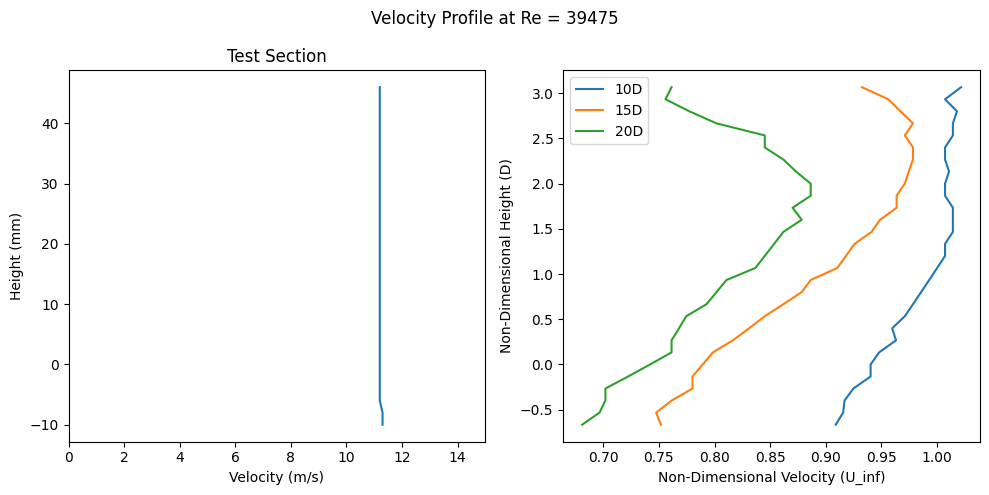

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df.Test_1250, df.H)
plt.title('Test Section')
plt.xlim([0, 15])
plt.xlabel('Velocity (m/s)')
plt.ylabel('Height (mm)')
plt.subplot(1,2,2)
plt.plot(unp.nominal_values(df.V1250_10/df.Vtest_1250), df.H/15, label='10D')
plt.plot(unp.nominal_values(df.V1250_15/df.Vtest_1250), df.H/15, label='15D')
plt.plot(unp.nominal_values(df.V1250_20/df.Vtest_1250), df.H/15, label='20D')
plt.legend()
plt.xlabel('Non-Dimensional Velocity (U_inf)')
plt.ylabel('Non-Dimensional Height (D)')
plt.suptitle('Velocity Profile at Re = 39475')
plt.tight_layout()

### RPM = 1450

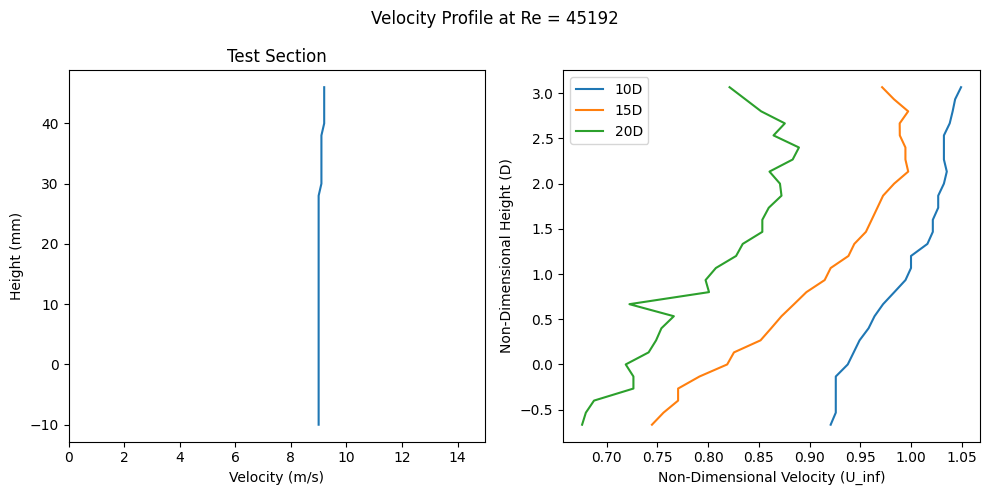

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df.Test_1450, df.H)
plt.title('Test Section')
plt.xlim([0, 15])
plt.xlabel('Velocity (m/s)')
plt.ylabel('Height (mm)')
plt.subplot(1,2,2)
plt.plot(unp.nominal_values(df.V1450_10/df.Vtest_1450), df.H/15, label='10D')
plt.plot(unp.nominal_values(df.V1450_15/df.Vtest_1450), df.H/15, label='15D')
plt.plot(unp.nominal_values(df.V1450_20/df.Vtest_1450), df.H/15, label='20D')
plt.legend()
plt.xlabel('Non-Dimensional Velocity (U_inf)')
plt.ylabel('Non-Dimensional Height (D)')
plt.suptitle('Velocity Profile at Re = 45192')
plt.tight_layout()

### RPM = 1650 

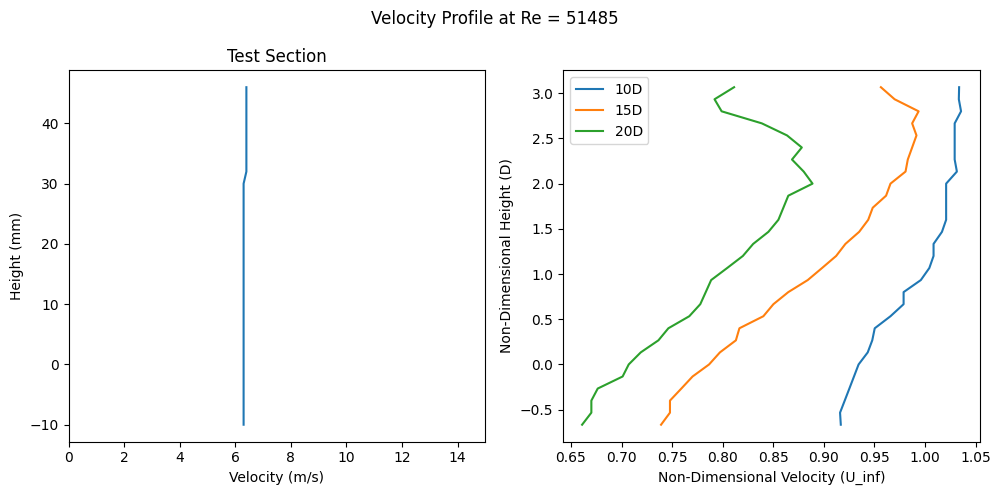

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df.Test_1650, df.H)
plt.title('Test Section')
plt.xlim([0, 15])
plt.xlabel('Velocity (m/s)')
plt.ylabel('Height (mm)')
plt.subplot(1,2,2)
plt.plot(unp.nominal_values(df.V1650_10/df.Vtest_1650), df.H/15, label='10D')
plt.plot(unp.nominal_values(df.V1650_15/df.Vtest_1650), df.H/15, label='15D')
plt.plot(unp.nominal_values(df.V1650_20/df.Vtest_1650), df.H/15, label='20D')
plt.legend()
plt.xlabel('Non-Dimensional Velocity (U_inf)')
plt.ylabel('Non-Dimensional Height (D)')
plt.suptitle('Velocity Profile at Re = 51485')
plt.tight_layout()

## Calculation of Drag Force and CD

In [14]:
Drag1250 = rho_air * 0.002 * ((um.fsum(df.V1250_10*df.Vtest_1250) - um.fsum(df.V1250_10*df.V1250_10)) + 
                              (um.fsum(df.V1250_15*df.Vtest_1250) - um.fsum(df.V1250_15*df.V1250_15)) +
                              (um.fsum(df.V1250_20*df.Vtest_1250) - um.fsum(df.V1250_20*df.V1250_20))) / 3

Drag1450 = rho_air * 0.002 * ((um.fsum(df.V1450_10*df.Vtest_1450) - um.fsum(df.V1450_10*df.V1450_10)) + 
                              (um.fsum(df.V1450_15*df.Vtest_1450) - um.fsum(df.V1450_15*df.V1450_15)) +
                              (um.fsum(df.V1450_20*df.Vtest_1450) - um.fsum(df.V1450_20*df.V1450_20))) / 3

Drag1650 = rho_air * 0.002 * ((um.fsum(df.V1650_10*df.Vtest_1650) - um.fsum(df.V1650_10*df.V1650_10)) + 
                              (um.fsum(df.V1650_15*df.Vtest_1650) - um.fsum(df.V1650_15*df.V1650_15)) +
                              (um.fsum(df.V1650_20*df.Vtest_1650) - um.fsum(df.V1650_20*df.V1650_20))) / 3
print(Drag1250, Drag1450, Drag1650)

0.205+/-0.005 0.244+/-0.005 0.348+/-0.005


In [27]:
CD_1250 = 2 * Drag1250 / rho_air / d / np.mean(unp.nominal_values(df.Vtest_1250))**2
CD_1450 = 2 * Drag1450 / rho_air / d / np.mean(unp.nominal_values(df.Vtest_1450))**2
CD_1650 = 2 * Drag1650 / rho_air / d / np.mean(unp.nominal_values(df.Vtest_1650))**2

Text(0.5, 1.0, 'Variation of Drag with Reynolds Number')

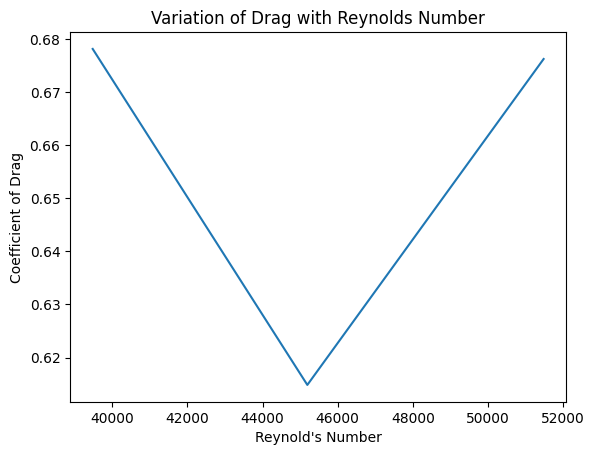

In [28]:
plt.plot([Re1250, Re1450, Re1650], [unp.nominal_values(CD_1250), unp.nominal_values(CD_1450), unp.nominal_values(CD_1650)])
plt.xlabel("Reynold's Number")
plt.ylabel("Coefficient of Drag")
plt.title("Variation of Drag with Reynolds Number")